1. **Import Libraries**:
   - Import necessary libraries for data manipulation, visualization, and machine learning algorithms.

2. **Load the Dataset**:
   - Use Pandas to read the dataset from a file into a DataFrame.

3. **Exploratory Data Analysis (EDA)**:
   - Examine dataset structure, data types, summary statistics, distributions, and identify missing values and outliers.

4. **Data Preprocessing**:
   - Handle missing values, encode categorical variables, scale numerical features, and split the dataset into features and labels.

5. **Split Data into Training and Testing Sets**:
   - Split the dataset into training and testing sets.

6. **Choose a Model**:
   - Select a machine learning algorithm suitable for the problem type.

7. **Train the Model**:
   - Train the selected model using the training dataset.

8. **Evaluate the Model**:
   - Evaluate the model's performance using the testing dataset.

9. **Tune Hyperparameters** (Optional):
   - Fine-tune the model's hyperparameters to improve performance.

10. **Make Predictions**:
    - Use the trained model to make predictions on new data.

11. **Evaluate and Iterate**:
    - Evaluate the model's performance on real-world data and iterate as necessary.

12. **Deploy the Model** (Optional):
    - If the model performs satisfactorily, deploy it in a production environment.
    

### Step 1: Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

### Step 2: Load the Dataset

In [2]:
pd.set_option('display.max_rows', 200)
df = pd.read_csv('DataUfc/data.csv')

### Column definitions:

```markdown
- **R_ and B_ Prefix**: Signifies red and blue corner fighter stats respectively.
- **_opp_ Columns**: Contain the average of damage done by the opponent on the fighter.
- **KD**: Number of knockdowns.
- **SIG_STR**: Number of significant strikes landed of attempted.
- **SIG_STR_pct**: Significant strikes percentage.
- **TOTAL_STR**: Total strikes landed of attempted.
- **TD**: Number of takedowns.
- **TD_pct**: Takedown percentages.
- **SUB_ATT**: Number of submission attempts.
- **PASS**: Number of times the guard was passed.
- **REV**: Number of reversals landed.
- **HEAD**: Number of significant strikes to the head landed of attempted.
- **BODY**: Number of significant strikes to the body landed of attempted.
- **CLINCH**: Number of significant strikes in the clinch landed of attempted.
- **GROUND**: Number of significant strikes on the ground landed of attempted.
- **win_by**: Method of win.
- **last_round**: Last round of the fight (e.g., if it was a KO in 1st, then this will be 1).
- **last_round_time**: When the fight ended in the last round.
- **Format**: Format of the fight (3 rounds, 5 rounds, etc.).
- **Referee**: Name of the referee.
- **Date**: Date of the fight.
- **Location**: Location in which the event took place.
- **Fight_type**: Weight class and whether it's a title bout or not.
- **Winner**: Winner of the fight.
- **Stance**: Stance of the fighter (orthodox, southpaw, etc.).
- **Height_cms**: Height in centimeters.
- **Reach_cms**: Reach of the fighter (arm span) in centimeters.
- **Weight_lbs**: Weight of the fighter in pounds (lbs).
- **Age**: Age of the fighter.
- **title_bout**: Boolean value of whether it is a title fight or not.
- **weight_class**: Weight class the fight is in (Bantamweight, Heavyweight, Women's Flyweight, etc.).
- **no_of_rounds**: Number of rounds the fight was scheduled for.
- **current_lose_streak**: Count of current concurrent losses of the fighter.
- **current_win_streak**: Count of current concurrent wins of the fighter.
- **draw**: Number of draws in the fighter's UFC career.
- **wins**: Number of wins in the fighter's UFC career.
- **losses**: Number of losses in the fighter's UFC career.
- **total_rounds_fought**: Average of total rounds fought by the fighter.
- **total_time_fought (seconds)**: Count of total time spent fighting in seconds.
- **total_title_bouts**: Total number of title bouts taken part in by the fighter.
- **win_by_Decision_Majority**: Number of wins by majority judges decision in the fighter's UFC career.
- **win_by_Decision_Split**: Number of wins by split judges decision in the fighter's UFC career.
- **win_by_Decision_Unanimous**: Number of wins by unanimous judges decision in the fighter's UFC career.
- **win_by_KO/TKO**: Number of wins by knockout in the fighter's UFC career.
- **win_by_Submission**: Number of wins by submission in the fighter's UFC career.
- **win_by_TKO_Doctor_Stoppage**: Number of wins by doctor stoppage in the fighter's UFC career.
```

### Step 3: Exploratory Data Analysis (EDA)

In [3]:
df

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN
6008,Orlando Wiet,Robert Lucarelli,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN
6009,Johnny Rhodes,David Levicki,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN
6010,Patrick Smith,Ray Wizard,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0


In [30]:
df.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 144 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    R_fighter                     6012 non-null   object 
 1    B_fighter                     6012 non-null   object 
 2    Referee                       5980 non-null   object 
 3    date                          6012 non-null   object 
 4    location                      6012 non-null   object 
 5    Winner                        6012 non-null   object 
 6    title_bout                    6012 non-null   bool   
 7    weight_class                  6012 non-null   object 
 8    B_avg_KD                      4585 non-null   float64
 9    B_avg_opp_KD                  4585 non-null   float64
 10   B_avg_SIG_STR_pct             4585 non-null   float64
 11   B_avg_opp_SIG_STR_pct         4585 non-null   float64
 12   B_avg_TD_pct                  4585 non-null   

In [5]:
df['date']

0       2021-03-20
1       2021-03-20
2       2021-03-20
3       2021-03-20
4       2021-03-20
           ...    
6007    1994-03-11
6008    1994-03-11
6009    1994-03-11
6010    1994-03-11
6011    1994-03-11
Name: date, Length: 6012, dtype: object

In [6]:
df.dtypes

R_fighter                        object
B_fighter                        object
Referee                          object
date                             object
location                         object
Winner                           object
title_bout                         bool
weight_class                     object
B_avg_KD                        float64
B_avg_opp_KD                    float64
B_avg_SIG_STR_pct               float64
B_avg_opp_SIG_STR_pct           float64
B_avg_TD_pct                    float64
B_avg_opp_TD_pct                float64
B_avg_SUB_ATT                   float64
B_avg_opp_SUB_ATT               float64
B_avg_REV                       float64
B_avg_opp_REV                   float64
B_avg_SIG_STR_att               float64
B_avg_SIG_STR_landed            float64
B_avg_opp_SIG_STR_att           float64
B_avg_opp_SIG_STR_landed        float64
B_avg_TOTAL_STR_att             float64
B_avg_TOTAL_STR_landed          float64
B_avg_opp_TOTAL_STR_att         float64


In [7]:
# Check for Duplication
#The nunique() method returns the number of unique values for each column
df.nunique()

R_fighter                       1514
B_fighter                       1987
Referee                          204
date                             550
location                         166
Winner                             3
title_bout                         2
weight_class                      14
B_avg_KD                         626
B_avg_opp_KD                     384
B_avg_SIG_STR_pct               2041
B_avg_opp_SIG_STR_pct           2013
B_avg_TD_pct                    1711
B_avg_opp_TD_pct                1736
B_avg_SUB_ATT                    753
B_avg_opp_SUB_ATT                653
B_avg_REV                        341
B_avg_opp_REV                    338
B_avg_SIG_STR_att               2509
B_avg_SIG_STR_landed            2124
B_avg_opp_SIG_STR_att           2543
B_avg_opp_SIG_STR_landed        2092
B_avg_TOTAL_STR_att             2613
B_avg_TOTAL_STR_landed          2275
B_avg_opp_TOTAL_STR_att         2641
B_avg_opp_TOTAL_STR_landed      2277
B_avg_TD_att                    1263
B

In [8]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,6002,6003,6004,6005,6006,6007,6008,6009,6010,6011
R_fighter,Adrian Yanez,Trevin Giles,Tai Tuivasa,Cheyanne Buys,Marion Reneau,Leonardo Santos,Song Kenan,Derek Brunson,Montel Jackson,Bruno Silva,...,Johnny Rhodes,Royce Gracie,Frank Hamaker,Royce Gracie,Jason DeLucia,Remco Pardoel,Orlando Wiet,Johnny Rhodes,Patrick Smith,Scott Morris
B_fighter,Gustavo Lopez,Roman Dolidze,Harry Hunsucker,Montserrat Conejo,Macy Chiasson,Grant Dawson,Max Griffin,Kevin Holland,Jesse Strader,JP Buys,...,Fred Ettish,Minoki Ichihara,Thaddeus Luster,Jason DeLucia,Scott Baker,Alberta Cerra Leon,Robert Lucarelli,David Levicki,Ray Wizard,Sean Daugherty
Referee,Chris Tognoni,Herb Dean,Herb Dean,Mark Smith,Mark Smith,Chris Tognoni,Keith Peterson,Herb Dean,Keith Peterson,Mark Smith,...,John McCarthy,John McCarthy,John McCarthy,John McCarthy,John McCarthy,John McCarthy,John McCarthy,John McCarthy,John McCarthy,John McCarthy
date,2021-03-20,2021-03-20,2021-03-20,2021-03-20,2021-03-20,2021-03-20,2021-03-20,2021-03-20,2021-03-20,2021-03-20,...,1994-03-11,1994-03-11,1994-03-11,1994-03-11,1994-03-11,1994-03-11,1994-03-11,1994-03-11,1994-03-11,1994-03-11
location,"Las Vegas, Nevada, USA","Las Vegas, Nevada, USA","Las Vegas, Nevada, USA","Las Vegas, Nevada, USA","Las Vegas, Nevada, USA","Las Vegas, Nevada, USA","Las Vegas, Nevada, USA","Las Vegas, Nevada, USA","Las Vegas, Nevada, USA","Las Vegas, Nevada, USA",...,"Denver, Colorado, USA","Denver, Colorado, USA","Denver, Colorado, USA","Denver, Colorado, USA","Denver, Colorado, USA","Denver, Colorado, USA","Denver, Colorado, USA","Denver, Colorado, USA","Denver, Colorado, USA","Denver, Colorado, USA"
Winner,Red,Red,Red,Blue,Blue,Blue,Blue,Red,Red,Red,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class,Bantamweight,Middleweight,Heavyweight,WomenStrawweight,WomenBantamweight,Lightweight,Welterweight,Middleweight,Bantamweight,Flyweight,...,OpenWeight,OpenWeight,OpenWeight,OpenWeight,OpenWeight,OpenWeight,OpenWeight,OpenWeight,OpenWeight,OpenWeight
B_avg_KD,0.0,0.5,NaN,NaN,0.125,0.0,0.046875,0.15625,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
B_avg_opp_KD,0.0,0.0,NaN,NaN,0.0,0.0,0.125,0.0,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


#### Summary Statistics for Numerical Columns:

In [9]:
#Calculate summary statistics for numerical columns (mean, median, standard deviation, etc.).
df.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6008.000000,5606.000000,6010.000000,5840.000000,5949.000000
mean,0.247476,0.176818,0.453310,0.434290,0.292650,0.268742,0.478884,0.409276,0.15673,0.141306,...,0.306886,1.251331,1.297572,0.796241,0.069195,178.991788,183.562347,170.686356,29.293151,29.598252
std,0.378509,0.324633,0.130458,0.132618,0.273628,0.267178,0.724229,0.653826,0.34199,0.322623,...,0.619485,1.681376,1.859955,1.355801,0.273980,8.812985,10.585313,35.724626,4.063297,4.167755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.376489,0.351045,0.031250,0.033203,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.00000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,0.500000,0.250000,0.527500,0.510000,0.500000,0.422812,0.750000,0.531250,0.12500,0.125000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.00000,3.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


#### Visualisation of Relationships Between Variables:

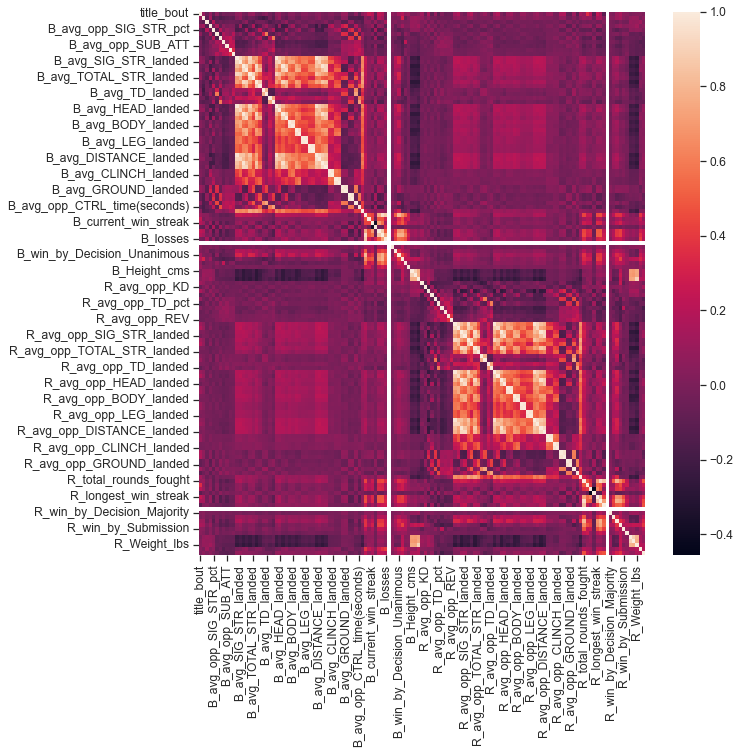

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

plt.show()

#### Target "ACTION" Distribution 

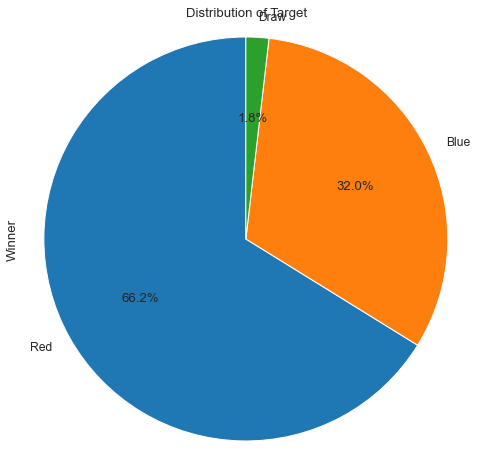

In [24]:
# Set the figure size
plt.figure(figsize=(8, 8))
# Plot pie chart
df['Winner'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 4: Data Preprocessing:

### Dealing with NaNs

In [10]:
df.isnull()
# Returns a boolean matrix, if the value is NaN then True otherwise False

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,True,True
6008,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,True,True
6009,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,True,True
6010,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,True,False


In [11]:
# Returns the column names along with the number of NaN values in that particular column
for column in df.columns:
    if df[column].isnull().sum()!=0:
        print(f"Nan in {column}: {df[column].isnull().sum()}")


Nan in Referee: 32
Nan in B_avg_KD: 1427
Nan in B_avg_opp_KD: 1427
Nan in B_avg_SIG_STR_pct: 1427
Nan in B_avg_opp_SIG_STR_pct: 1427
Nan in B_avg_TD_pct: 1427
Nan in B_avg_opp_TD_pct: 1427
Nan in B_avg_SUB_ATT: 1427
Nan in B_avg_opp_SUB_ATT: 1427
Nan in B_avg_REV: 1427
Nan in B_avg_opp_REV: 1427
Nan in B_avg_SIG_STR_att: 1427
Nan in B_avg_SIG_STR_landed: 1427
Nan in B_avg_opp_SIG_STR_att: 1427
Nan in B_avg_opp_SIG_STR_landed: 1427
Nan in B_avg_TOTAL_STR_att: 1427
Nan in B_avg_TOTAL_STR_landed: 1427
Nan in B_avg_opp_TOTAL_STR_att: 1427
Nan in B_avg_opp_TOTAL_STR_landed: 1427
Nan in B_avg_TD_att: 1427
Nan in B_avg_TD_landed: 1427
Nan in B_avg_opp_TD_att: 1427
Nan in B_avg_opp_TD_landed: 1427
Nan in B_avg_HEAD_att: 1427
Nan in B_avg_HEAD_landed: 1427
Nan in B_avg_opp_HEAD_att: 1427
Nan in B_avg_opp_HEAD_landed: 1427
Nan in B_avg_BODY_att: 1427
Nan in B_avg_BODY_landed: 1427
Nan in B_avg_opp_BODY_att: 1427
Nan in B_avg_opp_BODY_landed: 1427
Nan in B_avg_LEG_att: 1427
Nan in B_avg_LEG_lande


* Referee doesn't look like an important column. Let's delete that.
* Let's see if height and reach have a correlation
* The rest i.e. Age, Stance and Height, let's fill with the median of that column.

In [12]:
df['Referee'].isnull().sum()

32

In [13]:
df2 = df.copy()

In [14]:
df2['Referee'].head()

0    Chris Tognoni
1        Herb Dean
2        Herb Dean
3       Mark Smith
4       Mark Smith
Name: Referee, dtype: object

In [15]:
df2.drop(columns=['Referee'], inplace=True)

In [16]:
df2['R_Reach_cms']


0       177.80
1       187.96
2       190.50
3       160.02
4       172.72
         ...  
6007       NaN
6008       NaN
6009       NaN
6010       NaN
6011       NaN
Name: R_Reach_cms, Length: 6012, dtype: float64

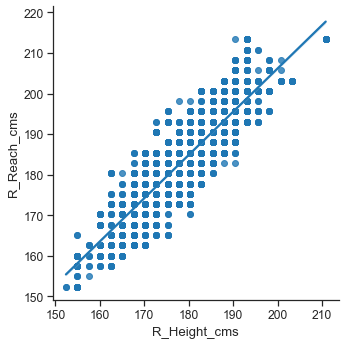

In [17]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('R_Height_cms', # Horizontal axis
           'R_Reach_cms', # Vertical axis
           data=df2, # Data source
           fit_reg=True # fix a regression line
           ) # S marker size

* We can see there is a positive correlation between height and reach. So we'll replace reach with height

In [18]:
df2['R_Reach_cms'].fillna(df2['R_Height_cms'], inplace=True)
df2['B_Reach_cms'].fillna(df2['B_Height_cms'], inplace=True)
df2.fillna(df2.median(), inplace=True)

In [19]:
df2['B_Stance'].value_counts()

Orthodox       4530
Southpaw       1165
Switch          238
Open Stance       9
Sideways          4
Name: B_Stance, dtype: int64

In [20]:
df2['R_Stance'].fillna('Orthodox', inplace=True)
df2['B_Stance'].fillna('Orthodox', inplace=True)

In [21]:
for column in df2.columns:
    if df2[column].isnull().sum()!=0:
        print(f"Nan in {column}: {df2[column].isnull().sum()}")

In [22]:
df2.isnull().sum()

R_fighter                       0
B_fighter                       0
date                            0
location                        0
Winner                          0
title_bout                      0
weight_class                    0
B_avg_KD                        0
B_avg_opp_KD                    0
B_avg_SIG_STR_pct               0
B_avg_opp_SIG_STR_pct           0
B_avg_TD_pct                    0
B_avg_opp_TD_pct                0
B_avg_SUB_ATT                   0
B_avg_opp_SUB_ATT               0
B_avg_REV                       0
B_avg_opp_REV                   0
B_avg_SIG_STR_att               0
B_avg_SIG_STR_landed            0
B_avg_opp_SIG_STR_att           0
B_avg_opp_SIG_STR_landed        0
B_avg_TOTAL_STR_att             0
B_avg_TOTAL_STR_landed          0
B_avg_opp_TOTAL_STR_att         0
B_avg_opp_TOTAL_STR_landed      0
B_avg_TD_att                    0
B_avg_TD_landed                 0
B_avg_opp_TD_att                0
B_avg_opp_TD_landed             0
B_avg_HEAD_att

### Removing non essential columns